   # Исследование рынка видеоигр
В нашем распоряжении данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года. Нам нужно провести исследование для международного магазина видеоигр: на исторических данных выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение данных

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display_html
import seaborn as sns
pd.set_option("display.float_format", "{:.2f}".format)

In [2]:
#чтение файла с данными и сохранение в df
data_link = 'https://code.s3.yandex.net/datasets/games.csv'
df = pd.read_csv(data_link)

In [3]:
#посмотрим данные
display (df.head())
display (df.tail())
display (df.sample(10))
display (df.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]).T)
display (df.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.00,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10887,Devil May Cry 4,PS4,2015.00,Action,0.01,0.00,0.08,0.00,NaN,NaN,NaN
6102,Street Hoops,XB,2002.00,Sports,0.21,0.06,0.00,0.01,58.00,8,T
7983,Cabela's Survival: Shadows of Katmai,X360,2011.00,Sports,0.14,0.03,0.00,0.01,NaN,3.5,T
5201,Tetrisphere,N64,1997.00,Puzzle,0.29,0.06,0.00,0.00,NaN,NaN,NaN
8617,Naruto: Ultimate Ninja Heroes 2 - The Phantom ...,PSP,2006.00,Fighting,0.14,0.00,0.00,0.01,64.00,7.8,T
7031,Epic Mickey 2: The Power of Two,WiiU,2012.00,Action,0.13,0.07,0.01,0.02,57.00,5.6,E
9681,Fire ProWrestling S: 6Men Scramble,SAT,1996.00,Fighting,0.00,0.00,0.12,0.00,NaN,NaN,NaN
4687,Football Manager Handheld 2011,PSP,2010.00,Sports,0.00,0.27,0.00,0.14,77.00,7.7,E
2204,Rise of the Tomb Raider,PS4,2016.00,Adventure,0.23,0.53,0.04,0.14,NaN,NaN,NaN
1325,NBA 2K14,PS4,2013.00,Sports,0.89,0.31,0.01,0.23,85.00,6.5,E


,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
Year_of_Release,16446.00,2006.48,5.88,1980.00,1996.00,2003.00,2007.00,2010.00,2015.00,2016.00,2016.00
NA_sales,16715.00,0.26,0.81,0.00,0.00,0.00,0.08,0.24,1.06,2.79,41.36
EU_sales,16715.00,0.15,0.50,0.00,0.00,0.00,0.02,0.11,0.62,1.94,28.96
JP_sales,16715.00,0.08,0.31,0.00,0.00,0.00,0.00,0.04,0.36,1.27,10.22
Other_sales,16715.00,0.05,0.19,0.00,0.00,0.00,0.01,0.03,0.20,0.63,10.57
Critic_Score,8137.00,68.97,13.94,13.00,43.00,60.00,71.00,79.00,89.00,94.00,98.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [4]:
#поиск явных дубликатов
df.duplicated().sum()

0

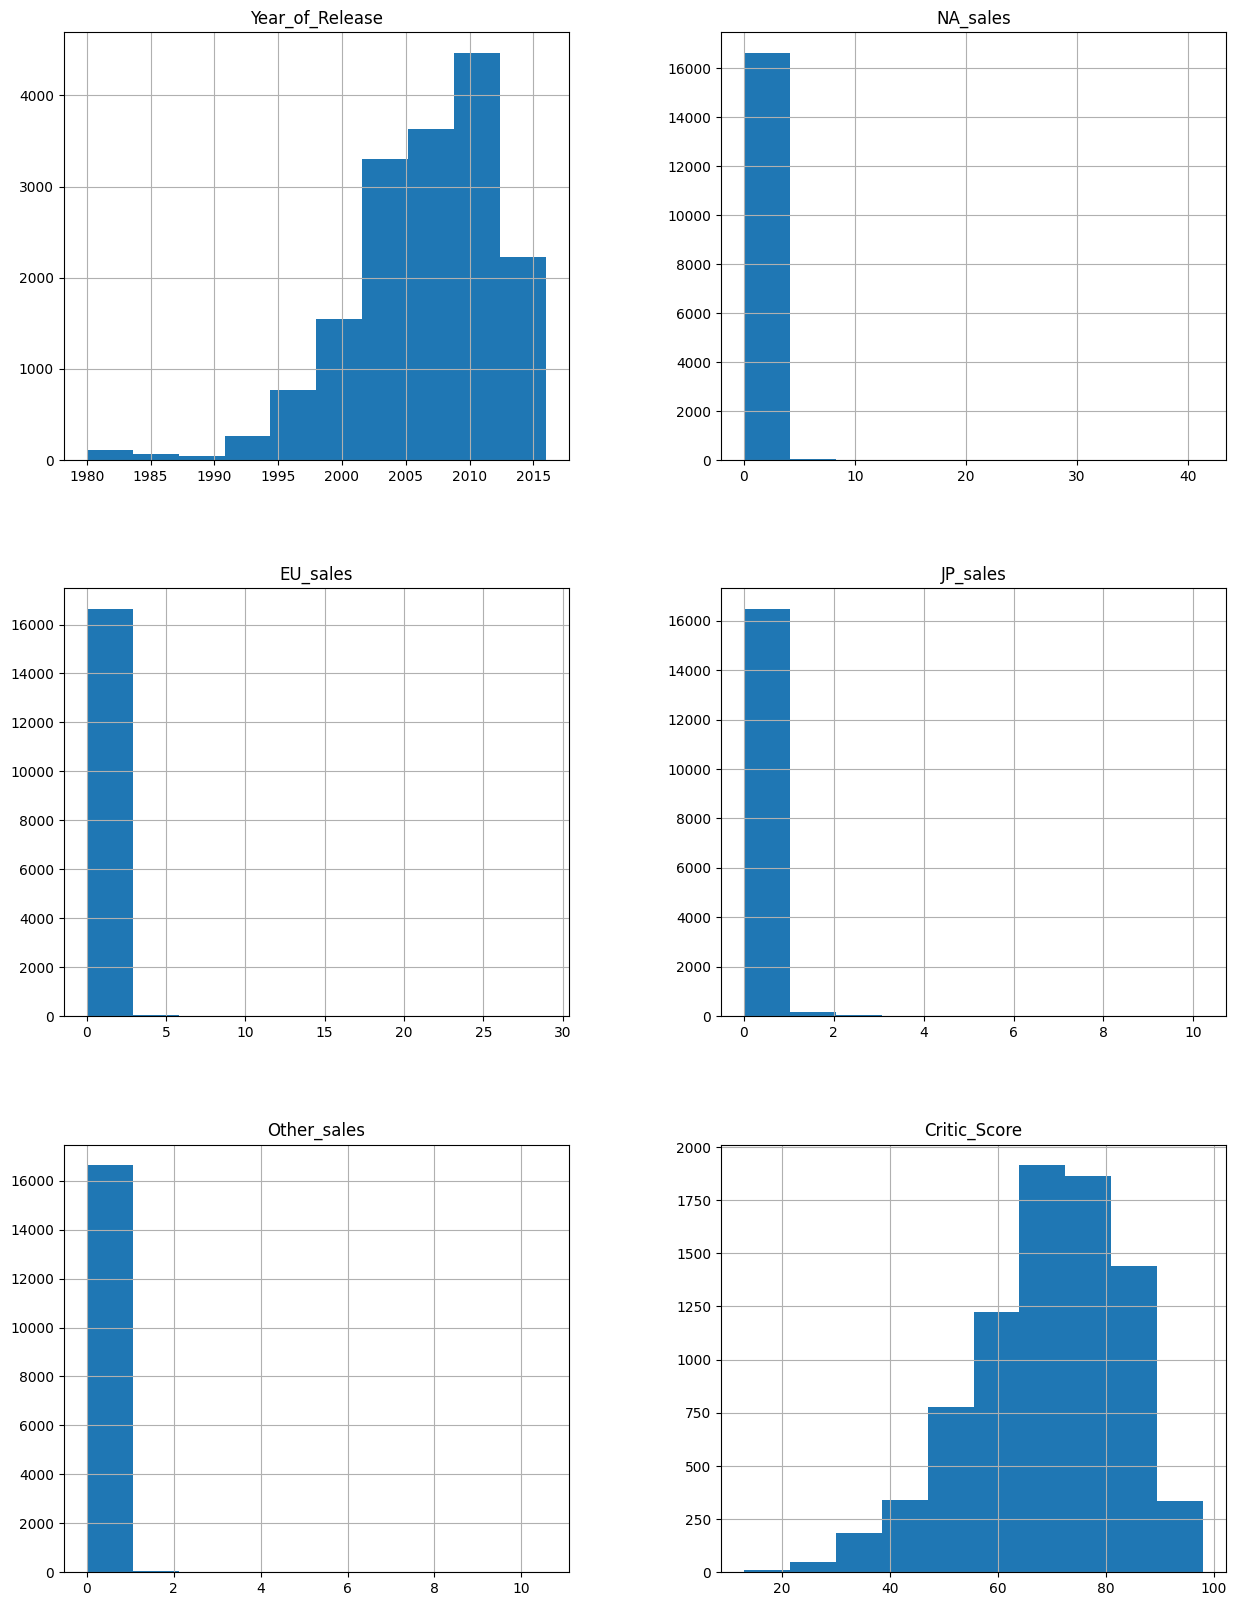

In [5]:
df.hist(figsize=(15, 20));

Файл содержит информацию о 16715 играх. Согласно документации к данным:
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

На данном этапе уже можно увидеть проблемы в данных. Посмотрим на них поближе и исправим.

## Предобработка данных

In [6]:
#поправим регистр заголовков
df.columns = [x.lower() for x in df.columns.values]

### Пропуски

In [7]:
#посмотрим пропуски
for column in df:
    print ('пропуски столбца', column)
    display (df[df[column].isna()])


пропуски столбца name


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


пропуски столбца platform


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


пропуски столбца year_of_release


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


пропуски столбца genre


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


пропуски столбца na_sales


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


пропуски столбца eu_sales


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


пропуски столбца jp_sales


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


пропуски столбца other_sales


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


пропуски столбца critic_score


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


пропуски столбца user_score


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


пропуски столбца rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Строки с пропусками в `name`, `genre` и  `year_of_release` можно безболезнено удалить. В `name` и `genre` всего по 2 строки и `year_of_release` 269, это меньше 2% всех данных.

In [8]:
#удалим эти строки
df = df.dropna(subset=['name']).reset_index(drop=True)
df = df.dropna(subset=['genre']).reset_index(drop=True)
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

В столбце `user_score` кроме числовых значений и NaN есть непонятные значения tbd. Есть сокращение tbd которое переводится как подлежит определению. Заменим эти значения на NaN.

In [9]:
#посмотрим уникальные значения user_score
df['user_score'].sort_values(ascending=False).unique()

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0', nan], dtype=object)

In [10]:
#заменим tbd на nan
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')

In [11]:
#посмотрим уникальные значения critic_score
df['critic_score'].sort_values(ascending=False).unique()

array([98., 97., 96., 95., 94., 93., 92., 91., 90., 89., 88., 87., 86.,
       85., 84., 83., 82., 81., 80., 79., 78., 77., 76., 75., 74., 73.,
       72., 71., 70., 69., 68., 67., 66., 65., 64., 63., 62., 61., 60.,
       59., 58., 57., 56., 55., 54., 53., 52., 51., 50., 49., 48., 47.,
       46., 45., 44., 43., 42., 41., 40., 39., 38., 37., 36., 35., 34.,
       33., 32., 31., 30., 29., 28., 27., 26., 25., 24., 23., 21., 20.,
       19., 17., 13., nan])

In [12]:
#посмотрим уникальные значения rating
df['rating'].sort_values(ascending=False).unique()

array(['T', 'RP', 'M', 'K-A', 'EC', 'E10+', 'E', 'AO', nan], dtype=object)

Разбиремся со значениями `rating`.
Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения. Пропуски скорее всего означают что нет информации о рейтинге или игра не проходила проверку.
* `T` — («Teen») — «Подросткам»
* `RP` — («Rating Pending») — «Рейтинг ожидается»
* `M` — («Mature») — «Для взрослых»
* `EC` — («Early childhood») — «Для детей младшего возраста»
* `E10+` — («Everyone 10 and older») — «Для всех от 10 лет и старше»
* `E` — («Everyone») — «Для всех»
* `AO` — («Adults Only 18+») — «Только для взрослых»
* `K-A` — («Kids to Adults») — «Для детей и взрослых». Этот рейтинг использовался до 1998 года , когда он был переименован в E.
Пропуски в рейтинге ESRB заменим на аббревиатуру ND - не определен. Устаревшую аббревиатуру "K-A" заменим на современное обозначение "E". Устаревшую аббревиатуру "K-A" заменим на современное обозначение "E".

In [13]:
df['rating'] = df['rating'].fillna(value='ND')
df['rating'] = df['rating'].replace('K-A', 'E')

Пропуски в столбцах рейтингов критиков и пользователей оставим без изменений. Они связаны, вероятно, с тем, что не каждая игра удостаивалась внимания критиков или доходила до широких международных рынков.

### Замена типов данных
Год выпуска сохранен с плавающей точкой, хотя никаких дробных частей в годах нет. Приведем их к целочисленному типу. Тектовые значения в столбце `user_score` приведем к дробным числам.

In [14]:
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = df['user_score'].astype(float)

### Cуммарные продажами во всех регионах

In [15]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [16]:
#посмотрим результат
display (df.info())
display (df.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10587,King of Clubs: Mini Golf,Wii,2008,Sports,0.09,0.00,0.00,0.01,NaN,NaN,ND,0.10
5053,The Legend of Spyro: A New Beginning,DS,2006,Platform,0.33,0.01,0.00,0.03,68.00,6.80,E,0.37
8328,Taz Wanted,PS2,2002,Platform,0.08,0.06,0.00,0.02,65.00,8.70,E,0.16
9344,Space Camp,Wii,2009,Action,0.12,0.00,0.00,0.01,NaN,6.20,E,0.13
10580,Derby Jockey 2,SNES,1995,Sports,0.00,0.00,0.10,0.00,NaN,NaN,ND,0.10
12932,Rave Master,GC,2002,Fighting,0.00,0.00,0.05,0.00,60.00,6.30,T,0.05
5547,Seaman: Kindan no Pet - Gaze Hakushi no Jikken...,PS2,2001,Simulation,0.00,0.00,0.32,0.00,NaN,NaN,ND,0.32
3756,Dragon Age: Inquisition,X360,2014,Role-Playing,0.36,0.12,0.00,0.05,NaN,5.10,M,0.53
15948,Serious Sam II,PC,2005,Shooter,0.00,0.01,0.00,0.00,74.00,7.00,M,0.01
8986,Gundam: The Battle Master,PS,1997,Fighting,0.00,0.00,0.13,0.01,NaN,NaN,ND,0.14


### Выводы
Мы привели имена столбцов к snake_case, привели данные в двух столбцах к целочисленному типу и избавились от записей с критичными пропусками в данных - названием и годом выпуска, а также добавили новые столбцы - подсчитали суммарный объем продаж во всех регионах. Всего из 16715 строк осталось 16444.

## Исследовательский анализ данных

### Релизы в разные годы
Посмотрим, какое количество релизов и продаж было в разные годы

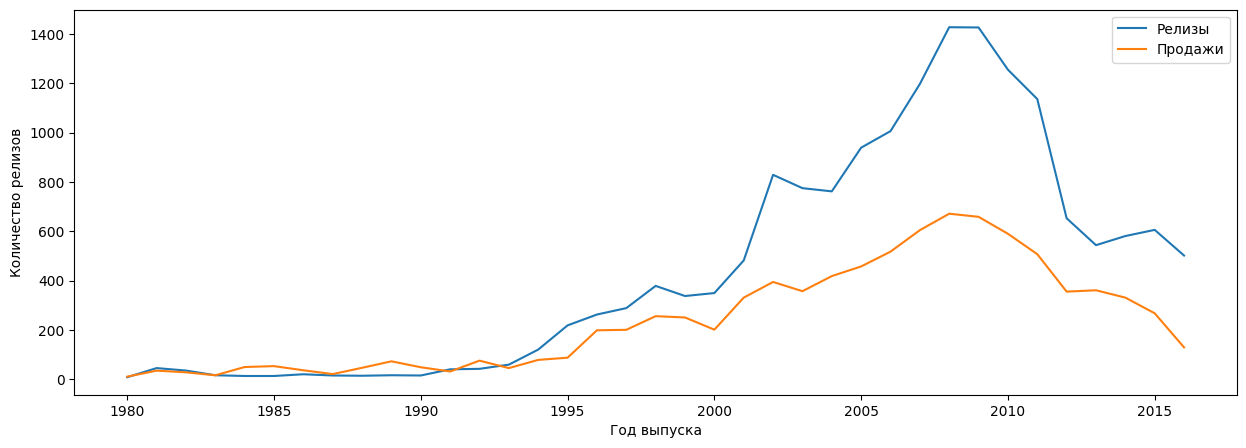

In [17]:
plt.figure(figsize=(15,5))
plt.plot(df.groupby('year_of_release')['name'].count(), label='Релизы')
plt.plot(df.groupby('year_of_release')['total_sales'].sum(), label='Продажи')
plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.show()

До 1995 года количество релизов очень низкое. Начиная с 1993 начинается рост с наиболиши показателями в 2008 году. Так как до 1994 года количество релизов совсем небольшое (менее 100 в год), эти данные можно не рассматривать далее.

In [18]:
#уберем данные до 1994
df_new = df[df['year_of_release'] > 1993]

### Релизы по платформам
Посмотрим, как выходили  игры на разных платформах. Создадим сводную таблицу и отфильтруем те платформы, на которых вышло очень мало игр. Выберем те платформы на которых было выпущено больше 40 игр.

In [19]:
platform_releases = df_new.pivot_table(index='platform', values='total_sales', columns = 'year_of_release', aggfunc = 'count', 
                                      fill_value=0, margins=True).reset_index()
platform_releases = platform_releases[:-1].query('All > 50').set_index('platform')
platform_releases.style.background_gradient()

year_of_release,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
platform,,,,,,,,,,,,,,,,,,,,,,,,
3DS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,93,91,80,86,46,512
DC,0,0,0,0,7,14,20,8,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,52
DS,0,0,0,0,0,0,0,0,0,0,23,118,201,376,492,403,323,153,23,8,0,0,0,2120
GB,3,4,6,8,8,11,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67
GBA,0,0,0,0,0,0,1,107,198,150,175,135,39,6,0,0,0,0,0,0,0,0,0,811
GC,0,0,0,0,0,0,0,22,152,144,83,97,40,4,0,0,0,0,0,0,0,0,0,542
N64,0,0,18,49,77,102,60,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,316
PC,6,2,4,6,8,7,7,15,19,33,30,37,52,62,76,107,90,139,61,38,47,50,54,950
PS,17,99,164,188,248,200,160,91,20,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1190


In [20]:
#топ платформ по количеству выпущенных игр
platform_releases.sort_values(by='All', ascending=False)['All'].head(10)

platform
PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       950
GBA      811
XB       803
Name: All, dtype: int64

Повторим тоже самое но для выручки. Уберем те платформы что заработали меньше 10 милионов.

In [21]:
platform_sales = df_new.pivot_table(index='platform', values='total_sales', columns = 'year_of_release', aggfunc = 'sum', 
                                      fill_value=0, margins=True).reset_index()
platform_sales = platform_sales[:-1].query('All > 10').set_index('platform')
platform_sales = platform_sales.rename_axis('index',  axis="columns")
platform_sales.style.background_gradient()

index,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
platform,,,,,,,,,,,,,,,,,,,,,,,,
3DS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.200000,51.360000,56.570000,43.760000,27.780000,15.140000,257.810000
DC,0.000000,0.000000,0.000000,0.000000,3.380000,5.160000,5.990000,1.070000,0.290000,0.000000,0.000000,0.000000,0.000000,0.020000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.950000
DS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.270000,130.140000,119.810000,146.940000,145.310000,119.540000,85.020000,26.180000,11.010000,1.540000,0.000000,0.000000,0.000000,802.760000
GB,12.180000,3.600000,36.030000,6.370000,26.900000,38.000000,19.760000,9.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.080000
GBA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,61.530000,74.160000,56.670000,77.910000,33.860000,5.280000,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,312.880000
GC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.340000,51.810000,50.610000,28.820000,27.620000,11.260000,0.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196.730000
N64,0.000000,0.000000,34.100000,39.500000,49.240000,57.870000,33.970000,3.250000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,218.010000
PC,12.870000,4.220000,10.580000,11.270000,3.260000,4.740000,4.660000,5.470000,8.570000,8.840000,10.390000,4.370000,2.850000,9.280000,12.420000,16.910000,24.280000,35.030000,23.220000,12.380000,13.280000,8.520000,5.250000,252.660000
PS,6.030000,35.960000,94.700000,136.170000,169.490000,144.530000,96.370000,35.590000,6.670000,2.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,727.580000


In [22]:
#топ платформ по выручке
platform_sales.sort_values(by='All', ascending=False)['All'].head(10)

platform
PS2    1233.56
X360    961.24
PS3     931.34
Wii     891.18
DS      802.76
PS      727.58
PS4     314.14
GBA     312.88
PSP     289.53
3DS     257.81
Name: All, dtype: float64

Построим распределение платформ из топа по годам

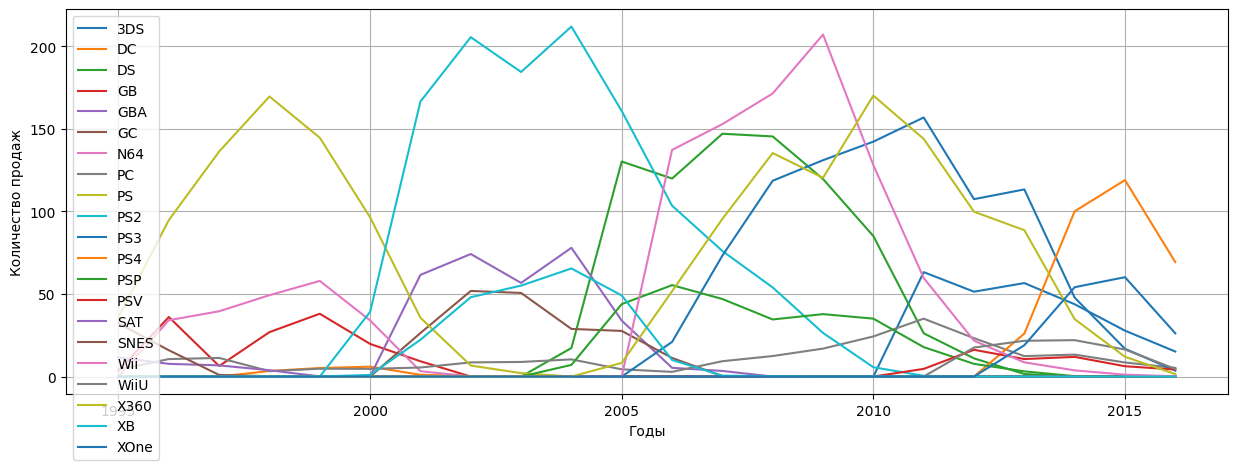

In [23]:
# графики продаж игр на самых популярных платформах
plt.figure(figsize=(15, 5))
for i in list(platform_sales.index):
    plt.plot(platform_sales.loc[platform_sales.index == i, list(platform_sales.columns[1:-1])].T, label=i)
plt.xlabel('Годы')
plt.ylabel('Количество продаж')
plt.grid()
plt.legend(loc='upper left')
plt.show()

### Продолжительность жизни платформ
Составим таблицу продолжительности жизни. Сравним, как долго живут популярные и не очень платформы. На всякий случай прибавим 1 к сроку жизни поскольку могут получится 0 сроки жизни. Срок жизни посчитаем как разницу даты выпуска первой и последней игры.

In [24]:
# создадим сводную таблицу
life_time = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
# переименуем столбцы для простоты
life_time.set_axis(['platform', 'min', 'max'], axis='columns', inplace=True)
# при подсчете длины жизни добавим одиницу
life_time['length'] = life_time['max'] - life_time['min'] + 1
display (life_time)
#все платформы
display (life_time['length'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))
#популярные платформы
life_time.query('platform in @platform_sales.index')['length'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

,platform,min,max,length
0,2600,1980,1989,10
1,3DO,1994,1995,2
2,3DS,2011,2016,6
3,DC,1998,2008,11
4,DS,1985,2013,29
5,GB,1988,2001,14
6,GBA,2000,2007,8
7,GC,2001,2007,7
8,GEN,1990,1994,5
9,GG,1992,1992,1


count   31.00
mean     8.61
std      7.00
min      1.00
5%       1.00
25%      4.00
50%      7.00
75%     11.00
95%     21.50
99%     31.10
max     32.00
Name: length, dtype: float64

count   21.00
mean    10.76
std      7.18
min      4.00
5%       4.00
25%      6.00
50%     10.00
75%     12.00
95%     29.00
99%     31.40
max     32.00
Name: length, dtype: float64

На всех данных средняя продолжительность составляет почти 7 лет, медианная - 8. Платформа-долгожитель - персональный компьютер, 32 года. Консоли приходят и уходят, десктопы продолжают жить.
Для самых популярных платформ средняя продолжительность составляет 10 лет, медианная - 10.

### Потенциально прибыльные платформы
Срок жизни платформы от 7 до 10 лет позволяет нам рассматривать только этот период. Нас не будут интерисовать платформы на которых небыло выпущено игр за 2016 год. Такие платформы скорее всего уже отжили свой срок. Найдем наиболее молодые и посмотрим лучшие платформы за прошлый год.

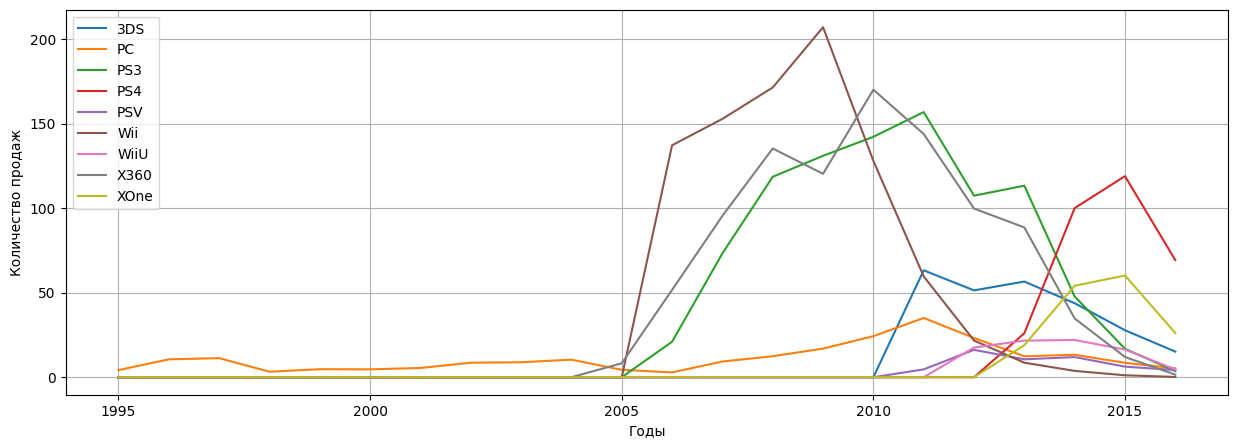

In [25]:
# графики продаж игр тех платформ на которых были выпущены игры в 2016 году
platform_sales_popular = platform_sales[platform_sales[2016] != 0]
plt.figure(figsize=(15, 5))
for i in list(platform_sales_popular.index):
    plt.plot(platform_sales_popular.loc[platform_sales_popular.index == i, list(platform_sales_popular.columns[1:-1])].T, label=i)
plt.xlabel('Годы')
plt.ylabel('Количество продаж')
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [26]:
# платформы с продажами в 2016 году и платформы с лучшими продажами в 2015
platform_sales_life = platform_sales.loc[platform_sales[2016] != 0, 
                   [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]]
platform_sales_life = platform_sales_life.sort_values(by=2015, ascending=False)[[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]].head(10)
platform_sales_life.style.background_gradient()

index,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,
PS4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.990000,100.000000,118.900000,69.250000
XOne,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.960000,54.070000,60.140000,26.150000
3DS,0.000000,0.000000,0.000000,0.000000,63.200000,51.360000,56.570000,43.760000,27.780000,15.140000
PS3,73.190000,118.520000,130.930000,142.170000,156.780000,107.360000,113.250000,47.760000,16.820000,3.600000
WiiU,0.000000,0.000000,0.000000,0.000000,0.000000,17.560000,21.650000,22.030000,16.350000,4.600000
X360,95.410000,135.260000,120.290000,170.030000,143.840000,99.740000,88.580000,34.740000,11.960000,1.520000
PC,9.280000,12.420000,16.910000,24.280000,35.030000,23.220000,12.380000,13.280000,8.520000,5.250000
PSV,0.000000,0.000000,0.000000,0.000000,4.630000,16.190000,10.590000,11.900000,6.250000,4.250000
Wii,152.770000,171.320000,206.970000,127.950000,59.650000,21.710000,8.590000,3.750000,1.140000,0.180000


In [27]:
# посмотрим на самые молодые платформы
life_time.query('max == 2016 and min > 2011')['platform']

18     PS4
27    WiiU
30    XOne
Name: platform, dtype: object

Наиболее интересно выглядят PlayStation 4, XBox One как самые молодые и растущие а так же Nintendo 3DS перевалившая свой пик но все еще популярная ну и PC всегда стабильная платформа.

In [28]:
#отфильтруем датафрейм по интересным нам платформам и за актуальный период
df_new = df.query('platform in @platform_sales_life.index and year_of_release > 2013')

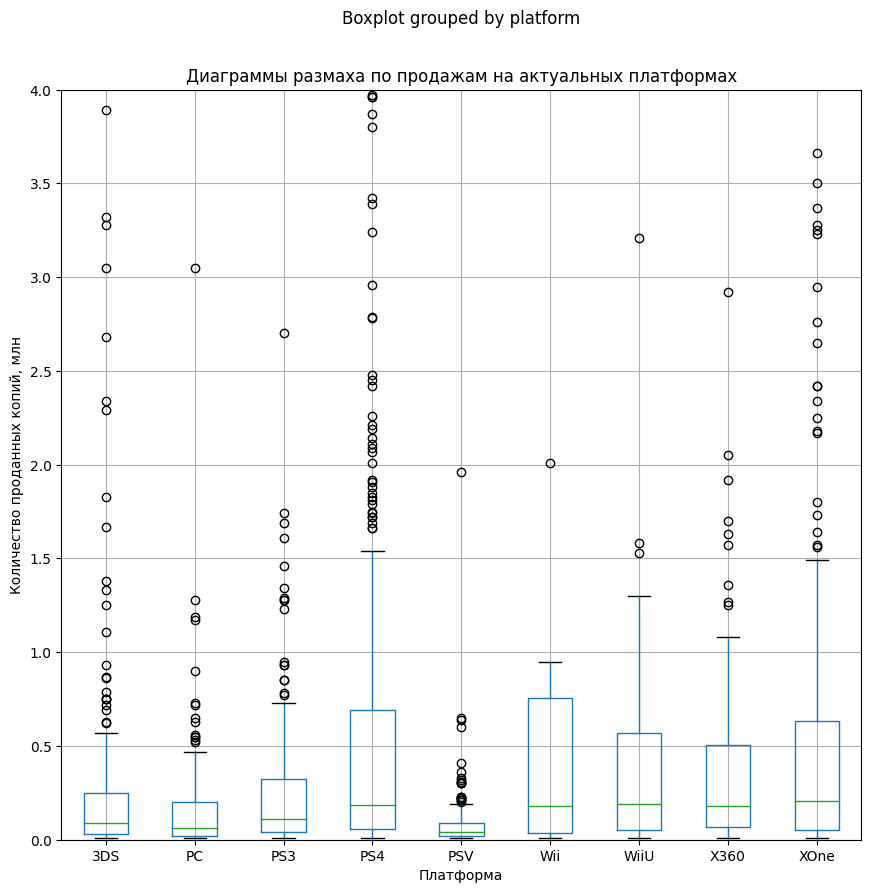

In [29]:
df_new[['platform', 'name', 'total_sales']].boxplot(column='total_sales', by='platform', figsize=(10,10))
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.ylim(0, 4)
plt.show()

In [30]:
display(df_new.pivot_table(index='platform', values='total_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
        .reset_index().sort_values(('median', 'total_sales'), ascending=False))

,platform,sum,mean,median,std,count
,,total_sales,total_sales,total_sales,total_sales,total_sales
8,XOne,140.36,0.62,0.20,1.05,228
6,WiiU,42.98,0.59,0.19,1.16,73
3,PS4,288.15,0.77,0.18,1.61,376
5,Wii,5.07,0.46,0.18,0.63,11
7,X360,48.22,0.43,0.18,0.63,111
2,PS3,68.18,0.31,0.11,0.63,219
0,3DS,86.68,0.41,0.09,1.19,212
1,PC,27.05,0.18,0.06,0.33,151
4,PSV,22.40,0.08,0.04,0.14,295


Лидером продаж является PlayStation 4, но и размах продаж по годам у нее самый большой. ПК является самой непопулярной платформой, но и самой стабильной - размах самый узкий. Медианные продажи по каждой из платформ заметно меньше 1 млн, но выбросы показывают, что у каждой из платформ случаются супер-хиты, приносящие миллионы - доля таких успешных проектов выше всего у PlayStation 4 и XBox one - это видно и по большему среднему значению числа продаж.

### Связь продаж и рейтингов
Посмотрим, как влияют оценки пользователей и критиков на продажи игр.


PS4
Корреляция между оценкой критиков и продажами: 0.41
Корреляция между оценкой пользователей и продажами: -0.032
Корреляция между оценками критиков и пользователей: 0.56



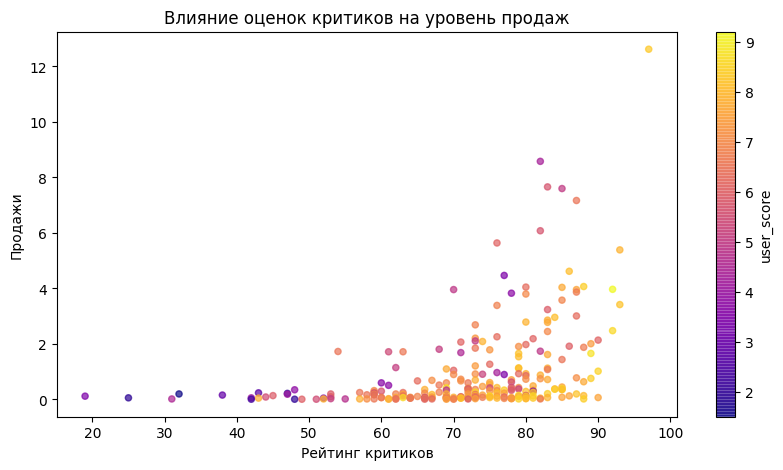

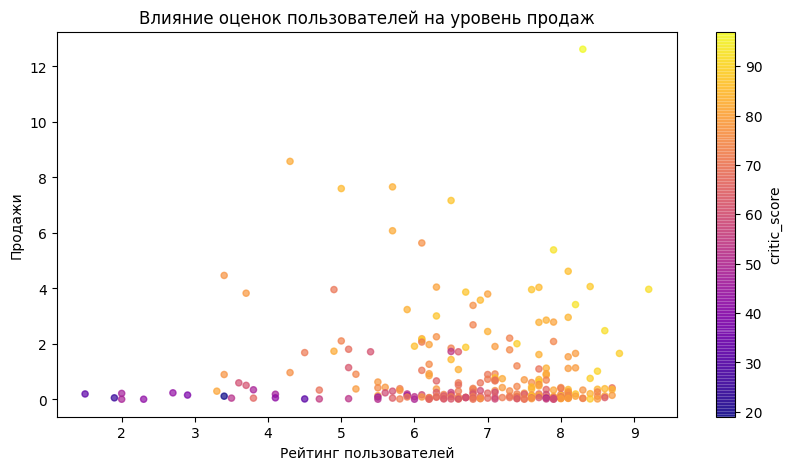

-----------------------------------------------------------------------------
XOne
Корреляция между оценкой критиков и продажами: 0.42
Корреляция между оценкой пользователей и продажами: -0.069
Корреляция между оценками критиков и пользователей: 0.47



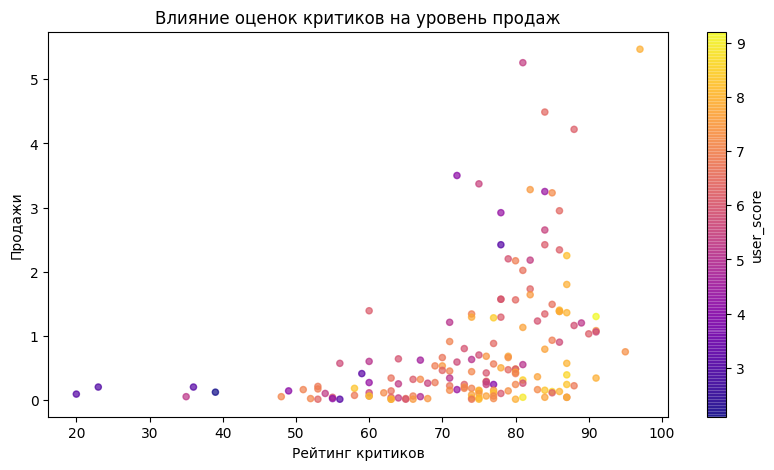

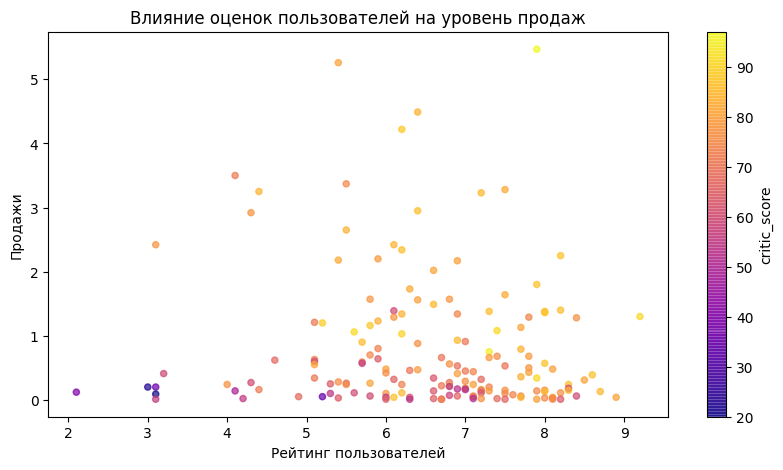

-----------------------------------------------------------------------------
3DS
Корреляция между оценкой критиков и продажами: 0.35
Корреляция между оценкой пользователей и продажами: 0.22
Корреляция между оценками критиков и пользователей: 0.75



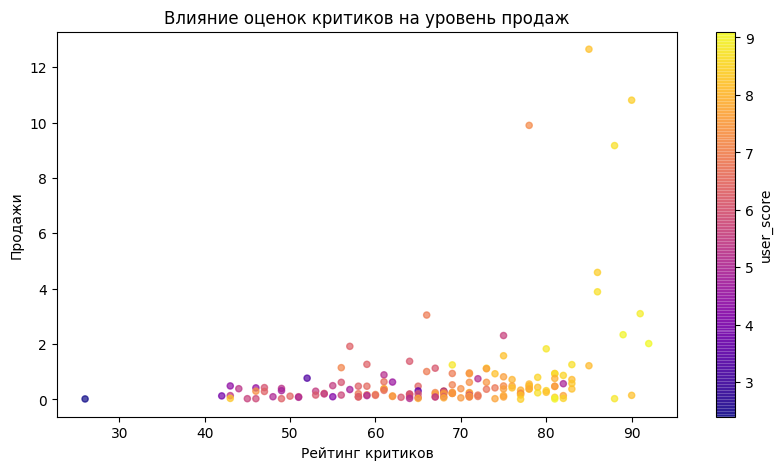

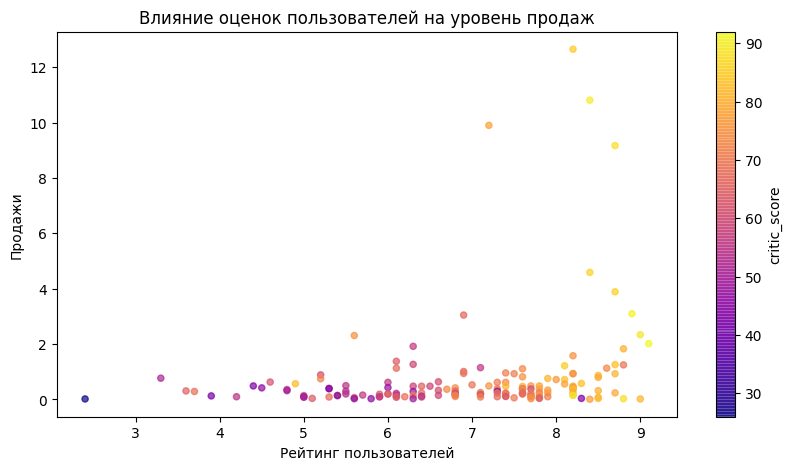

-----------------------------------------------------------------------------
PS3
Корреляция между оценкой критиков и продажами: 0.43
Корреляция между оценкой пользователей и продажами: 0.13
Корреляция между оценками критиков и пользователей: 0.63



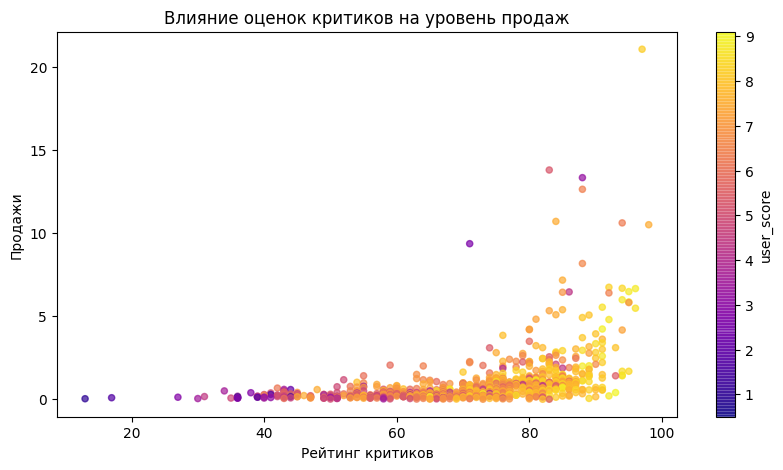

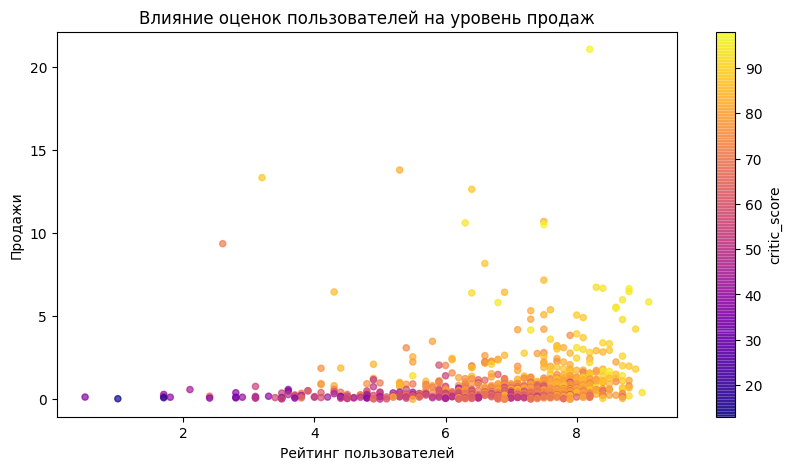

-----------------------------------------------------------------------------
WiiU
Корреляция между оценкой критиков и продажами: 0.35
Корреляция между оценкой пользователей и продажами: 0.4
Корреляция между оценками критиков и пользователей: 0.77



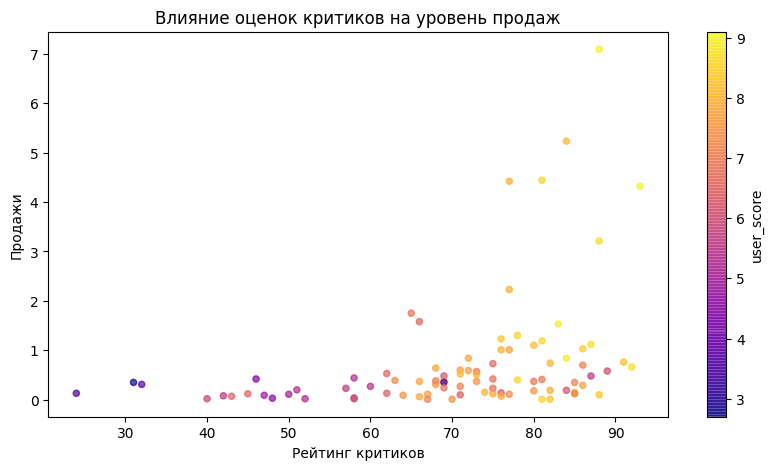

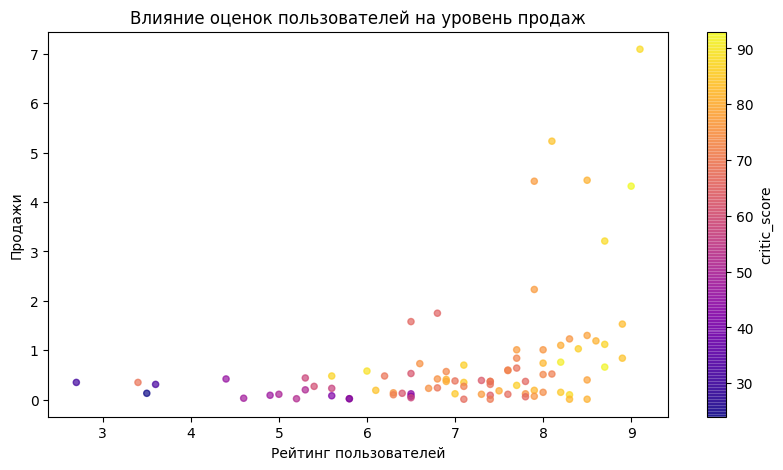

-----------------------------------------------------------------------------
X360
Корреляция между оценкой критиков и продажами: 0.4
Корреляция между оценкой пользователей и продажами: 0.11
Корреляция между оценками критиков и пользователей: 0.62



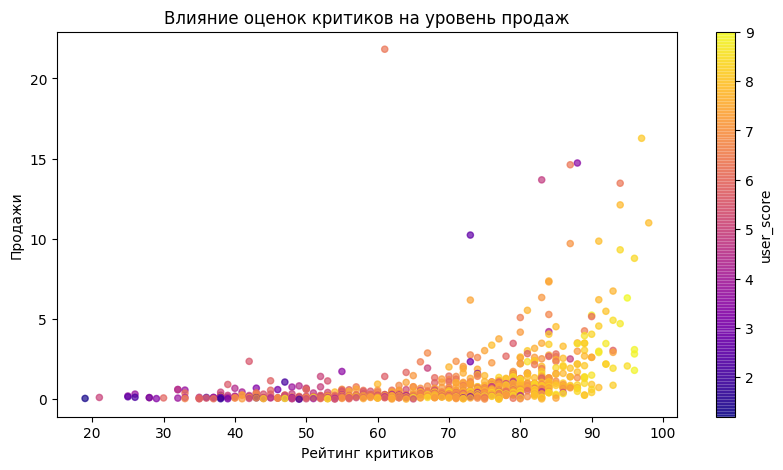

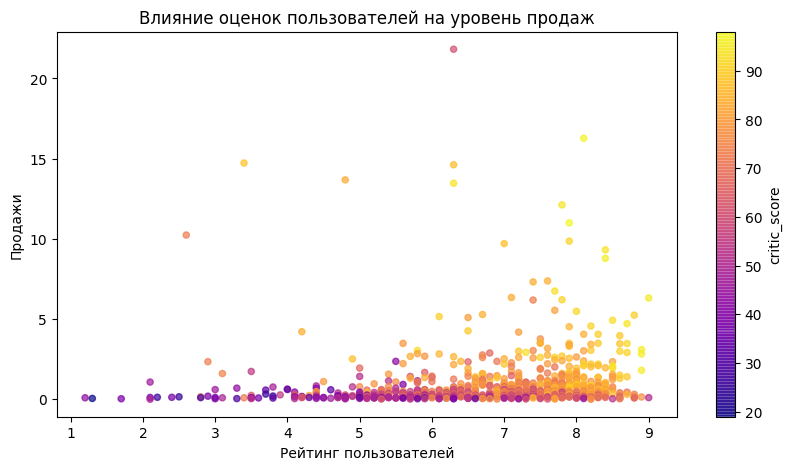

-----------------------------------------------------------------------------
PC
Корреляция между оценкой критиков и продажами: 0.3
Корреляция между оценкой пользователей и продажами: -0.0096
Корреляция между оценками критиков и пользователей: 0.52



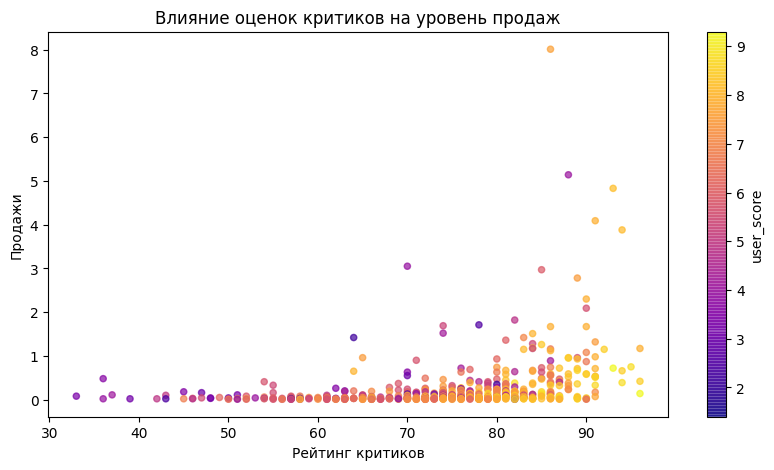

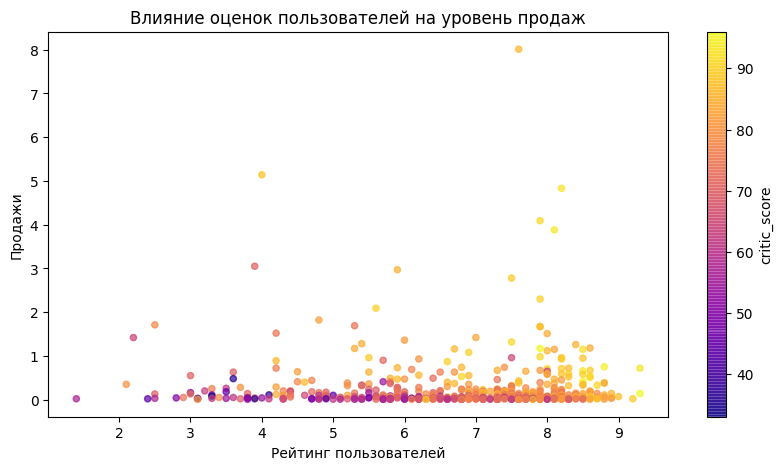

-----------------------------------------------------------------------------
PSV
Корреляция между оценкой критиков и продажами: 0.13
Корреляция между оценкой пользователей и продажами: 0.013
Корреляция между оценками критиков и пользователей: 0.73



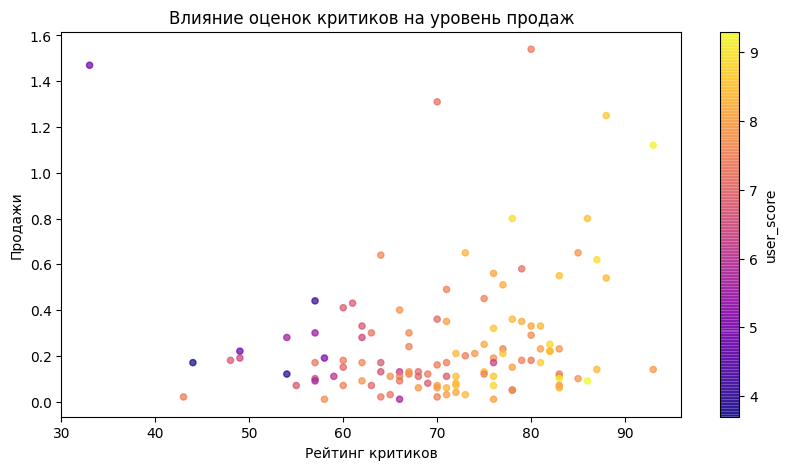

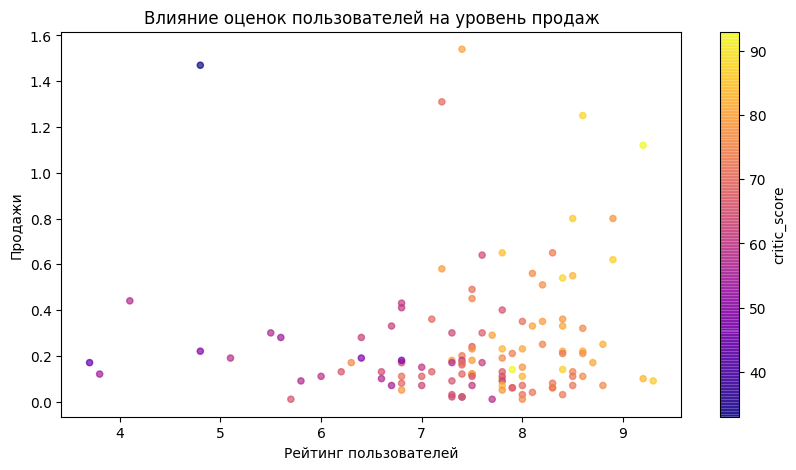

-----------------------------------------------------------------------------
Wii
Корреляция между оценкой критиков и продажами: 0.24
Корреляция между оценкой пользователей и продажами: 0.14
Корреляция между оценками критиков и пользователей: 0.69



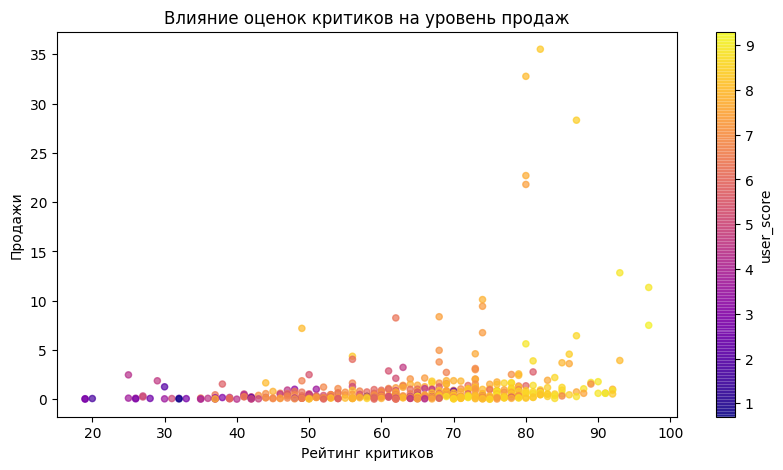

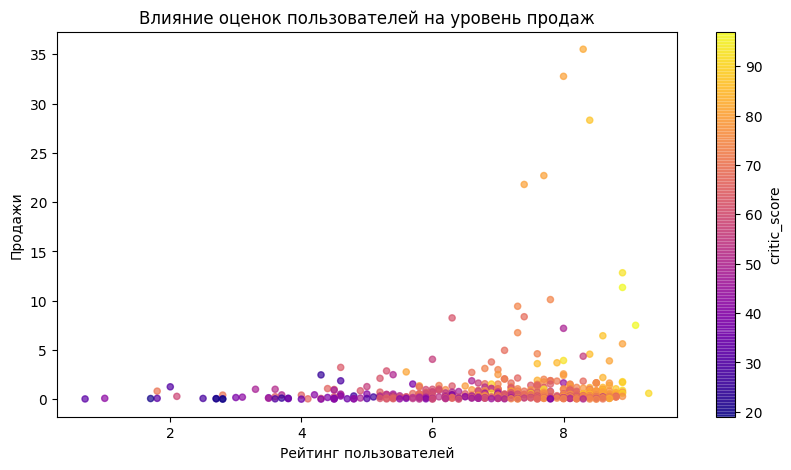

-----------------------------------------------------------------------------


In [31]:
#посмотрим кореляцию для других платформ
for i in platform_sales_life.index:
    print(i)
    df_critic = df.query('platform == @i and year_of_release > 2006')
    print(f'Корреляция между оценкой критиков и продажами: {df_critic["critic_score"].corr(df_critic["total_sales"]):.2}')
    print(f'Корреляция между оценкой пользователей и продажами: {df_critic["user_score"].corr(df_critic["total_sales"]):.2}')
    print(f'Корреляция между оценками критиков и пользователей: {df_critic["critic_score"].corr(df_critic["user_score"]):.2}')
    print()
    df_critic.plot.scatter('critic_score',  'total_sales', figsize=(10, 5), alpha=0.7, c='user_score', colormap='plasma', sharex=False)
    plt.xlabel('Рейтинг критиков')
    plt.ylabel('Продажи')
    plt.title('Влияние оценок критиков на уровень продаж')
    plt.show()
    df_critic.plot.scatter('user_score', 'total_sales', figsize=(10, 5), alpha=0.7, c='critic_score', colormap='plasma', sharex=False)
    plt.xlabel('Рейтинг пользователей')
    plt.ylabel('Продажи')
    plt.title('Влияние оценок пользователей на уровень продаж')
    plt.show()
    print('-----------------------------------------------------------------------------')

В целом распределение ожидаемое, чем выше оценка критиков, тем выше продажи, линейная корреляция сильнее между оценками критиков и продажами, а между продажами и оценками пользователей корреляция гораздо слабее и часто вообще отрицательная.

### Жанры игр
Посмотрим, как распределены вышедшие игры по жанрам.

In [32]:
genre = df_new.pivot_table(index='genre', values='total_sales', columns = 'year_of_release', 
                           aggfunc = 'sum',fill_value=0, margins=True).reset_index()
genre = genre[:-1]
genre= genre.rename_axis('index',  axis="columns").set_index('genre').sort_values(
    by='All', ascending=False)
genre.style.background_gradient()

index,2014,2015,2016,All
genre,,,,
Action,97.150000,71.900000,30.110000,199.160000
Shooter,65.210000,67.510000,38.220000,170.940000
Sports,45.060000,40.840000,23.490000,109.390000
Role-Playing,45.620000,37.640000,18.180000,101.440000
Misc,23.360000,11.570000,2.600000,37.530000
Fighting,15.850000,7.900000,4.470000,28.220000
Racing,16.660000,8.070000,2.790000,27.520000
Platform,8.810000,6.050000,3.230000,18.090000
Adventure,5.520000,8.160000,3.820000,17.500000


Построим графики продаж по годам для самых популярных жанров экшен, спортивные игры, шутеры и RPG.

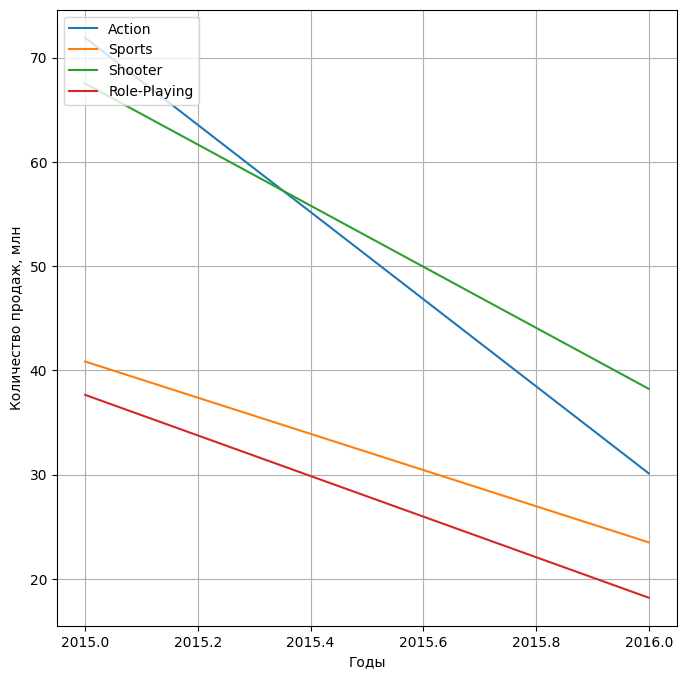

In [33]:
plt.figure(figsize=(8, 8))
for i in ['Action', 'Sports', 'Shooter', 'Role-Playing']:
    plt.plot(genre.loc[i, list(genre.columns[1:-1])].T, label=i)
plt.xlabel('Годы')
plt.ylabel('Количеcтво продаж, млн')
plt.grid()
plt.legend(loc='upper left')
plt.show()

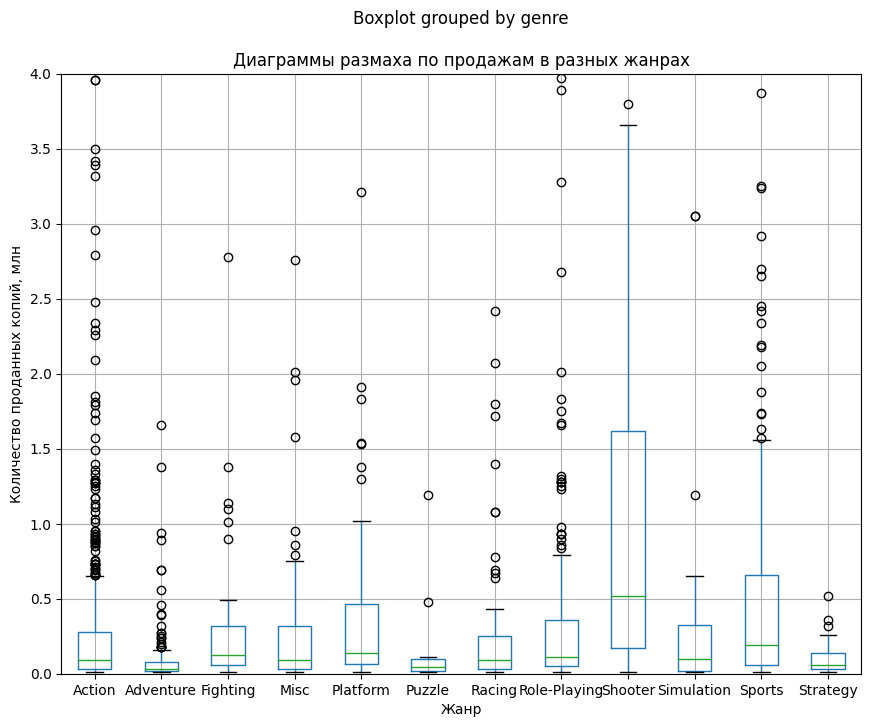

In [34]:
#посмотрим диаграммы размаха по жанрам
(df_new[['total_sales', 'genre']]
 .boxplot(column='total_sales', by='genre', figsize=(10,8))
)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам в разных жанрах')
plt.ylim(0, 4)
plt.show()

In [35]:
display(df_new.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])
        .reset_index().sort_values(('median', 'total_sales'), ascending=False))

,genre,sum,mean,median,std,count
,,total_sales,total_sales,total_sales,total_sales,total_sales
8,Shooter,170.94,1.34,0.52,2.05,128
10,Sports,109.39,0.68,0.19,1.24,160
4,Platform,18.09,0.48,0.14,0.72,38
2,Fighting,28.22,0.47,0.12,1.19,60
7,Role-Playing,101.44,0.46,0.11,1.18,221
9,Simulation,13.13,0.30,0.10,0.65,44
0,Action,199.16,0.32,0.09,0.80,613
3,Misc,37.53,0.34,0.09,0.74,111
6,Racing,27.52,0.40,0.09,0.96,69


Из этих данных видно, что экшны лидеры по количеству релизов и валовым продажам, но по медианым продажам даже не входят в пятерку, шутеры в лидерах по средним продажам. Также среди лидеров спортивные игры и платформеры.

### Выводы
В среднем жизненный цикл платформы составляет от 7 до 10 лет.

PlayStation 4, XBox One, WiiU как самые молодые и растущие а так же Nintendo 3DS, XBox 360, PlayStation 3. Персональные компьютеры, никогда не являясь лидерами по продажам, занимают небольшую стабильную нишу.

Наиболее популярными жанрами являются спортивные игры, шутеры, платформеры и RPG. Несмотря на огромное количество релизов, экшены не являются лидерами по продажам.

## Портрет пользователя по регионам
Поработаем с пользователями каждого региона (NA, EU, JP)

### Популярные платформы
Составим топ-5 платформ для каждого региона и сравним с топами компаний-производителей.

In [36]:
html_str = ''
s1 = (df_new.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s1}</td>'
s2 = (df_new.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s2}</td>'
s3 = (df_new.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s3}</td>'
display_html(html_str, raw = True)

,na_sales
platform,
PS4,98.610000
XOne,81.270000
X360,28.300000
3DS,22.640000
PS3,22.050000
,eu_sales
platform,
PS4,130.040000
XOne,46.250000


<Figure size 640x480 with 0 Axes>

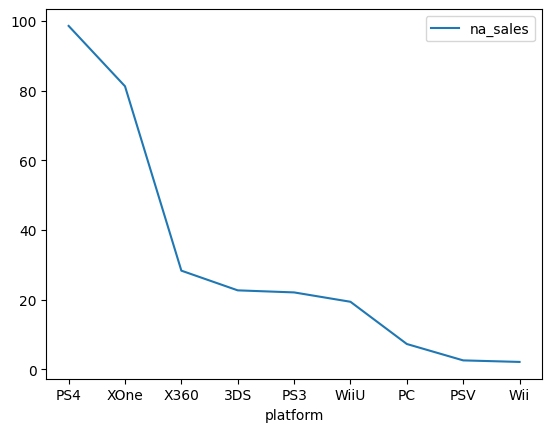

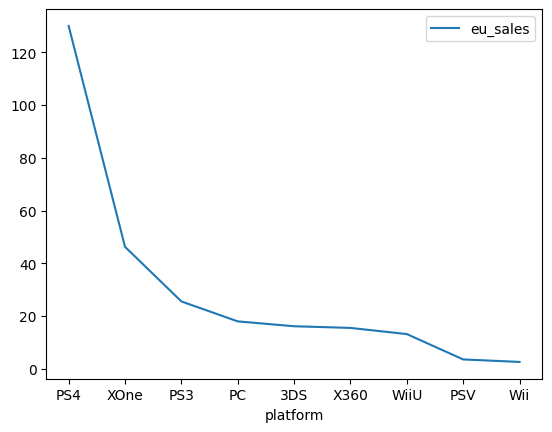

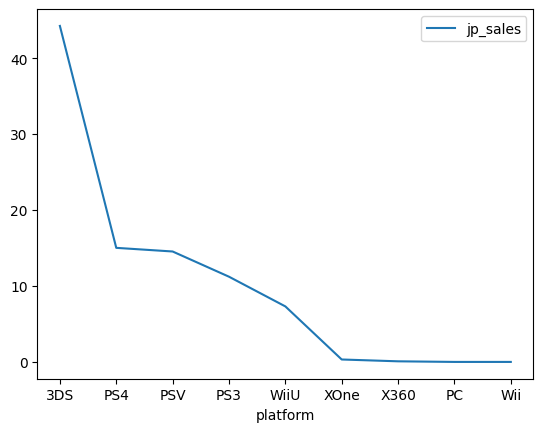

In [37]:
fig = plt.figure()
ax_1 = df_new.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).plot()
ax_2 = df_new.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot()
ax_3 = df_new.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).plot()
plt.show()

В Европе и Северной Америке топ-5 плаформ состоит почти из одинаковых консолей, хотя и в разном порядке - XBox 360, PlayStation 4, PlayStation 3, 3DS, XOne и РС. Разница в том что персоональный компьютер заменяет XOne в европе. И там, и там относительно свежая PlayStation4 уже набрала популярность. В Японии Xbox 360 вошла в топ на последнем месте, лидер - мобильная консоль Nintendo. Продаж игр для ПК в Японии нет совсем. В японии более популярны мобильные платформы.

### Популярные жанры
Составим топ-5 жанров для каждого региона за последние 10 лет.

In [38]:
html_str = ''
s1 = (df_new.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s1}</td>'
s2 = (df_new.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s2}</td>'
s3 = (df_new.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head()
    .style.render().replace('table','table style="display:inline; margin:10px"')
)
html_str += f'<td>{s3}</td>'
display_html(html_str, raw = True)

,na_sales
genre,
Shooter,79.020000
Action,72.530000
Sports,46.130000
Role-Playing,33.470000
Misc,15.050000
,eu_sales
genre,
Action,74.680000
Shooter,65.520000


В Европе и Северной Америке лидируют экшены, спортивные игры и шутеры. В Японии экшены только на втором месте по популярности, лидеры - RPG, а шутеры всего на 3 месте, а так же в топе появляются файтинги и симуляторы.

### Влияние рейтинга ESRB
Посмотрим, как влияет рейтинг ESRB на продажи игр в различных регионах.

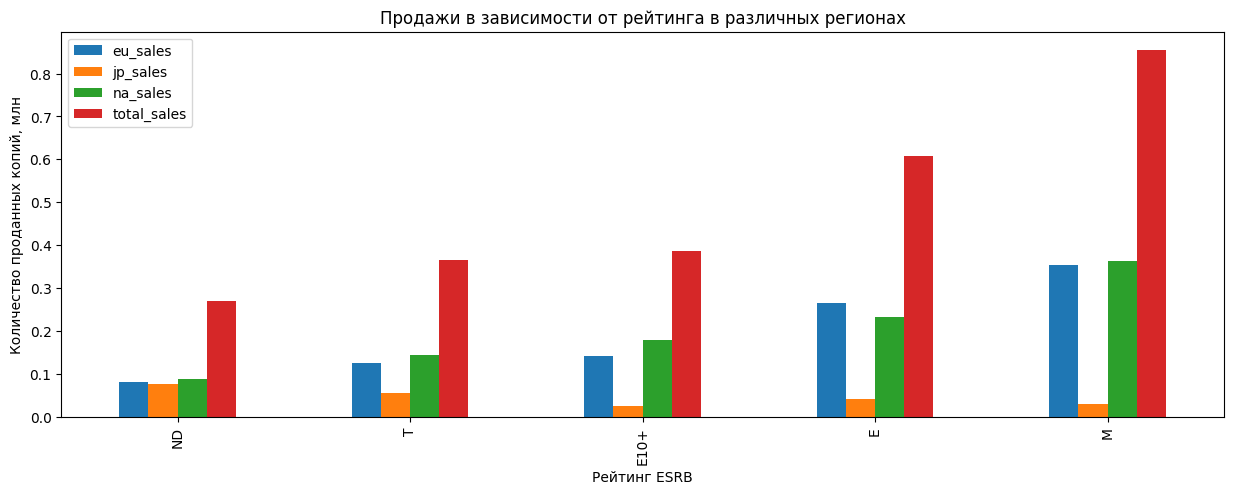

In [39]:
df_new.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc='mean').sort_values(
    by='na_sales').plot(kind='bar', figsize=(15, 5))
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий, млн')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()

Топ самых продаваемых категорий в Америке и Европе совпадает. Больше всего продаются игры с рейтингом Для взрослых то есть M. Следом идут игры для всех - игры или E.
Рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики). Поэтому в Японии так популярны игры вовсе без этого рейтинга - судя по всему, это игры, созданные в Японии и не получавшие рейтинга.

### Выводы
Региональные особенности влияют и на то, какие жанры популярны, и какие платформы.

В Европе и Северной Америке лидеры отличаются незначительно: наиболее популярны стационарные платформы - XBox 360, XOne, PlayStation 3 и PlayStation 4. В Японии же в топе мобильные консоли - Nintendo 3DS и WiiU, но стационарные PlayStation 3 и PlayStation 4 также популярны. Продаж игр для ПК в Японии согласно имеющимся данным нет совсем.

В Европе и Северной Америке лидируют экшены, спортивные игры и шутеры. В Японии экшены только на втором месте по популярности, лидеры - RPG, а шутеры всего на 3 месте, а так же в топе появляются файтинги и симуляторы.
Топ самых продаваемых категорий в Америке и Европе совпадает. Больше всего продаются игры с рейтингом Для взрослых то есть M. Следом идут игры для всех - игры или E.

## Проверка гипотез

### 1 Гипотеза
Проверим, отличаются ли средние пользовательские рейтинги платформ Xbox One и PC. Нулевая гипотеза - "средние рейтинги не отличаются". Альтернативная гипотеза - "средние рейтинги отличаются".

Значение критического уровня вероятности (альфа) примем равным 5%.

In [40]:
display(df_new.query('platform in ["XOne", "PC"]')
        .pivot_table(index='platform', values='user_score', aggfunc=['count', 'mean', 'median']))
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    df_new[(df_new.platform == "XOne") & (df_new.user_score.notna())]['user_score'], 
    df_new[(df_new.platform == "PC") & (df_new.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

,count,mean,median
,user_score,user_score,user_score
platform,,,
PC,122,6.30,6.80
XOne,165,6.59,6.80


p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Хотя получившееся p-value не столь велико, вероятность получить такие значения статистически мала. Оценки пользователей на этих платформах не отличаются.

### 2 Гипотеза
Проверим, отличаются ли средние пользовательские рейтинги жанров Экшен и Спорт. Нулевая гипотеза - "средние рейтинги не отличаются". Альтернативная гипотеза - "средние рейтинги отличаются".

Значение критического уровня вероятности (альфа) примем равным 5%.


In [41]:
display(df_new.query('genre in ["Action", "Sports"]')
        .pivot_table(index='genre', values='user_score', aggfunc=['count', 'mean', 'median']))
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    df_new[(df_new.genre == "Action") & (df_new.user_score.notna())]['user_score'], 
    df_new[(df_new.genre == "Sports") & (df_new.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

,count,mean,median
,user_score,user_score,user_score
genre,,,
Action,297,6.76,7.10
Sports,127,5.23,5.50


p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Так как принятый критический уровень вероятности 5%, гипотезу следует отвергнуть как маловероятную. Оценки пользователей этих жанров отличаются.

### Выводы
Оценки пользователей не зависят от платформ, но зависят от жанров игр. На основании принятого нами значения критического уровня статистической значимости 5% мы можем предполагать, что первая гипотеза верна, а вторая нет.

## Вывод
Мы изучили выборку данных об видеоиграх, вышедших с 1980 по 2016 годы на различных платформах - консолях и персональных компьютерах. На основе этих данных мы выяснили, какие игры могут хорошо продаваться в 2017 году и составили портреты пользователей разных регионов.

1. В среднем жизненный цикл платформы составляет от 7 до 10 лет.
PlayStation 4, XBox One, WiiU как самые молодые и растущие а так же Nintendo 3DS, XBox 360, PlayStation 3. Персональные компьютеры, никогда не являясь лидерами по продажам, занимают небольшую стабильную нишу.
Наиболее популярными жанрами являются спортивные игры, шутеры, платформеры и RPG. Несмотря на огромное количество релизов, экшены не являются лидерами по продажам.

2. Региональные особенности влияют и на то, какие жанры популярны, и какие платформы.
В Европе и Северной Америке лидеры отличаются незначительно: наиболее популярны стационарные платформы - XBox 360, XOne, PlayStation 3 и PlayStation 4. В Японии же в топе мобильные консоли - Nintendo 3DS и WiiU, но стационарные PlayStation 3 и PlayStation 4 также популярны. Продаж игр для ПК в Японии согласно имеющимся данным нет совсем.
В Европе и Северной Америке лидируют экшены, спортивные игры и шутеры. В Японии экшены только на втором месте по популярности, лидеры - RPG, а шутеры всего на 3 месте, а так же в топе появляются файтинги и симуляторы.
Топ самых продаваемых категорий в Америке и Европе совпадает. Больше всего продаются игры с рейтингом Для взрослых то есть M. Следом идут игры для всех - игры или E.

3. Продажи игр сильнее коррелируют с оценкой критиков, чем с оценками пользователей. При этом оценки пользователкй зависят не от платформы, а от жанра.

4. Оценки пользователей не зависят от платформ, но зависят от жанров игр.